# Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Plan pracy:


*   Rozwiązanie problemu metodą brute force.
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi
*   Dla metody brute force wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* 




In [2]:
import numpy as np
import itertools
#!nvidia-smi

In [2]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])

In [3]:
class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity
    

  def solve_knapsack_brute_force(self):
    permutations = list(itertools.product([0,1],repeat=len(weights)))
    profits_sum = 0
    weights_sum = 0
    taken_items = []
    result = 0
    
    for i in range(len(permutations)):
      for k in range(len(weights)):
        if permutations[i][k] == 1:
          weights_sum += weights[k]
          if weights_sum <= capacity:
            profits_sum += profits[k]
          else:
            profits_sum = 0
            break
      if profits_sum > result:
        result = profits_sum
        taken_items = permutations[i]
      profits_sum = 0
      weights_sum = 0

    return result, taken_items
          
        
          

  def solve_knapsack_pw_ratio(self):
    proportions = [0 for _ in range(len(weights))]
    taken_items = [0 for _ in range(len(weights))]
    profits_sum = 0
    weights_sum = 0
    result = 0
    
    for i in range(len(weights)):
      proportions[i] = (profits[i]/weights[i], i)
    
    proportions.sort(reverse=1)
    
    for i in range(len(weights)):
      weights_sum += weights[proportions[i][1]]
      if weights_sum <= capacity:
        profits_sum += profits[proportions[i][1]]
        taken_items[proportions[i][1]] = 1
      else:
        weights_sum -= weights[proportions[i][1]]
   
    result = profits_sum 
    
    return result, taken_items
        

In [4]:
Plecak = KnapSack(profits, weights, capacity)
wynik, przedmioty = Plecak.solve_knapsack_brute_force()
print("Wynik metody brute force:")
print(wynik)
print("Zabierane przedmioty:")
print(przedmioty)

Wynik metody brute force:
17
Zabierane przedmioty:
(0, 1, 1, 0)


In [5]:
wynik, przedmioty = Plecak.solve_knapsack_pw_ratio()
print("Wynik metody heurystycznej:")
print(wynik)
print("Zabierane przedmioty:")
print(przedmioty)

Wynik metody heurystycznej:
14
Zabierane przedmioty:
[0, 1, 0, 1]


### Zadanie z dopisywanymi wartościami

In [6]:
import time
import random
n = 16 #number of items + 1
time_elapsed = [0 for _ in range(n)]
items_number = 4
for i in range(n):
    Backpack = KnapSack(profits, weights, capacity)
    
    time_start = time.time()
    Plecak.solve_knapsack_brute_force()
    time_end = time.time()
    time_elapsed[i] = (time_end - time_start, items_number)
    
    items_number += 1
    weights = np.append(weights, random.randint(1,10))
    profits = np.append(profits, random.randint(1,20))
print(time_elapsed)
    

[(4.1484832763671875e-05, 4), (7.843971252441406e-05, 5), (0.0001800060272216797, 6), (0.0002453327178955078, 7), (0.0005526542663574219, 8), (0.0010464191436767578, 9), (0.0020682811737060547, 10), (0.004366874694824219, 11), (0.008430004119873047, 12), (0.056438446044921875, 13), (0.03672051429748535, 14), (0.06656146049499512, 15), (0.13916969299316406, 16), (0.26718926429748535, 17), (0.6365091800689697, 18), (1.3214397430419922, 19)]


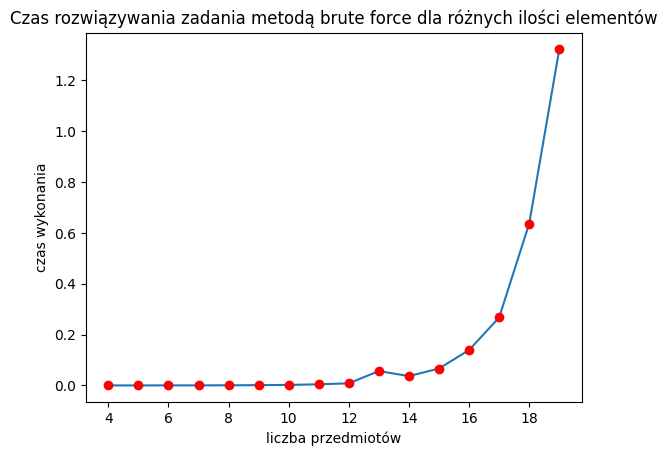

In [7]:
import matplotlib.pyplot as plt 
y_val, x_val = zip(*time_elapsed)
plt.plot(x_val, y_val)
plt.plot(x_val, y_val, "or")
plt.xlabel("liczba przedmiotów")
plt.ylabel("czas wykonania")
plt.title("Czas rozwiązywania zadania metodą brute force dla różnych ilości elementów")
plt.show()


# Wnioski
Wyniki obu metod różnią się. Metoda brute force jest dokładna, zawsze podaje dobry wynik. Jest jednak znacznie wolniejsza od metody heurystycznej ze względu na przeliczanie przez wszystkie możliwości ułożenia przedmiotów. Jak widać na powyższym wykresie, czas ten rośnie wykładniczo. Metoda heurystyczna natomiast nie zawsze podaje dobry wynik, jest on jednak zbliżony do wartości właściwej. Największą zaletą tej metody jest szybki czas jej działania (rośnie liniowo).

Dobierając metodę, należy zwrócić uwagę na ilość przedmiotów w plecaku oraz na wymaganą dokładność algorytmu.